In [3]:
### Import Statements ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the Dataset

In [4]:
data = pd.read_csv('titanic_train.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Visualizing missing Values

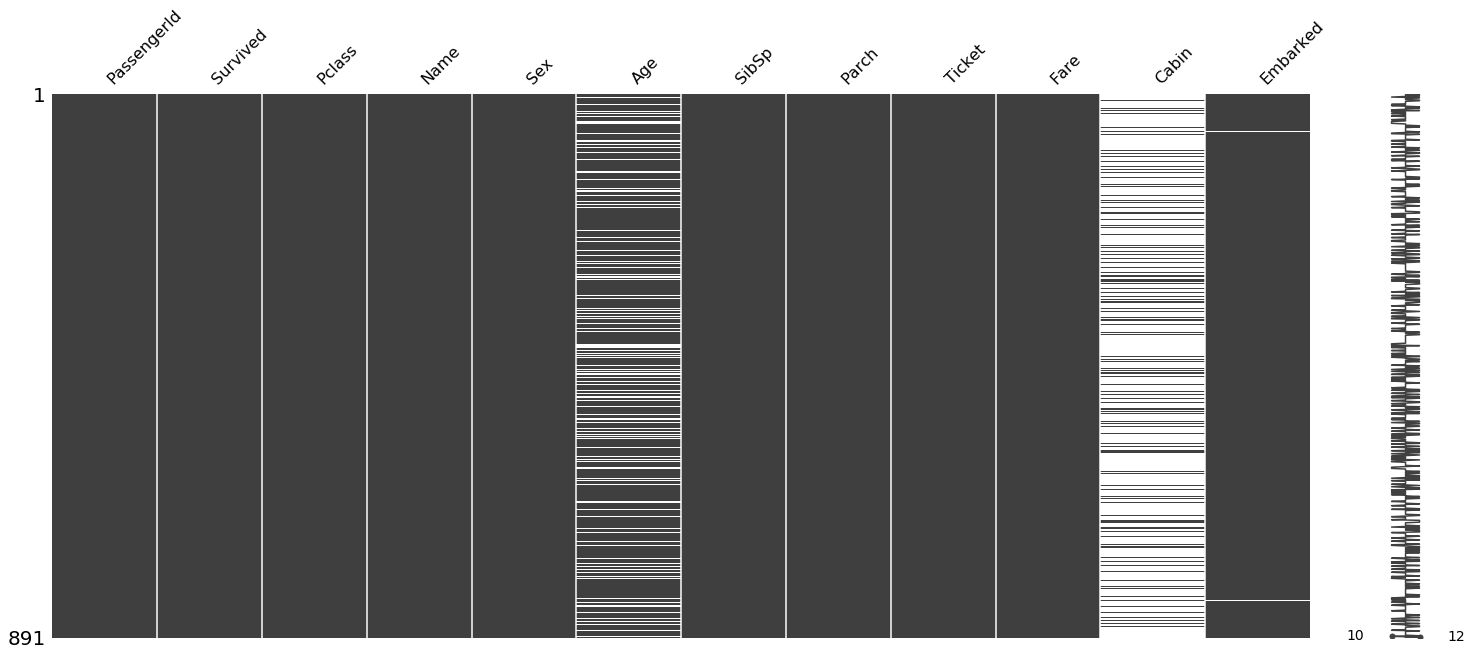

In [300]:
ms.matrix(data)

We can observe that there are missing values in features Age, Cabin, Embarked.

# Cleaning the data

In [6]:
data['Cabin'].count()

204

There are 687 rows does not have the Cabin data. Hence we are dropping it.

In [7]:
def droping_features(feature_names,dt):
    dt.drop(feature_names,axis=1,inplace=True)

In [8]:
droping_features('Cabin',data)

Still we have missing values in Embarked and Age. As age is an important feature we can not drop it. Instead we are going to fill the missing values.

In [9]:
def data_impute(features):
    if pd.isnull(features[0]):
        if features[1] == 1:
            return 37
        elif features[1] == 2:
            return 29
        else:
            return 24
    else:
        return features[0]
    

In [10]:
data['Age'] = data[['Age','Pclass']].apply(data_impute,axis=1)

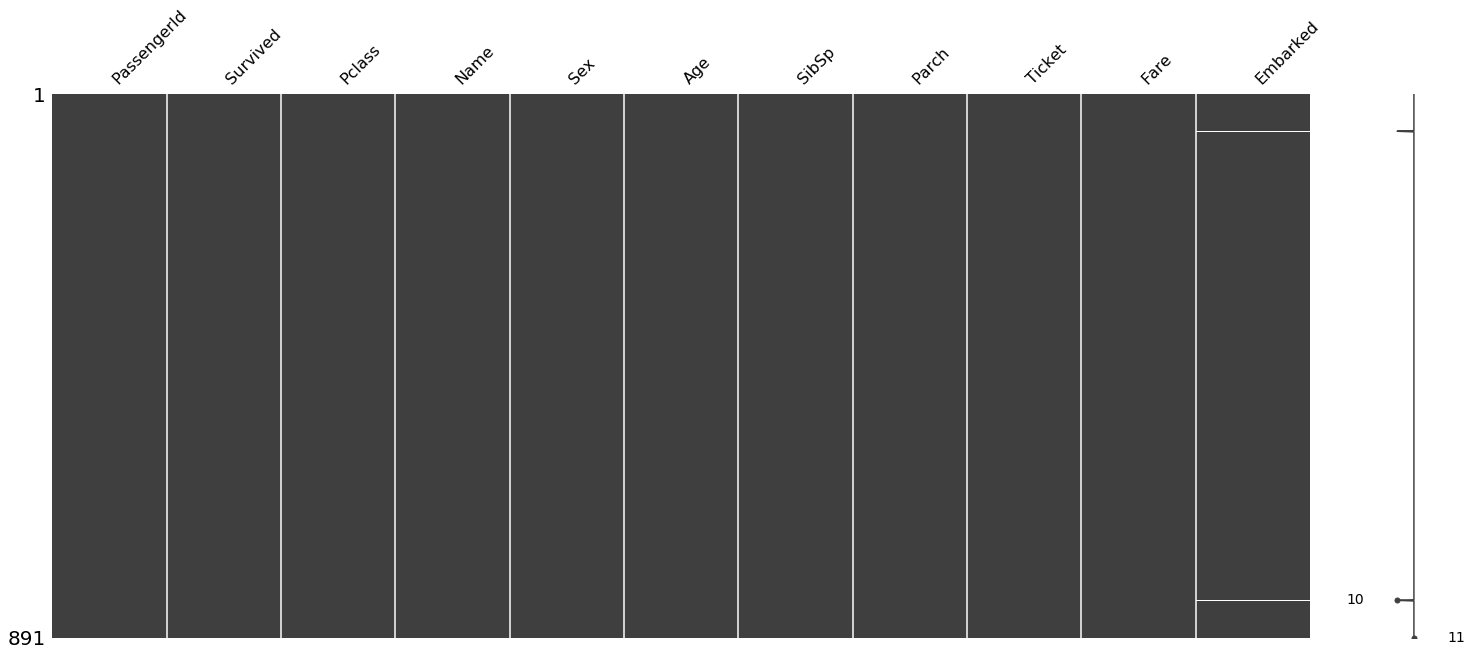

In [306]:
ms.matrix(data)

In [11]:
data.dropna(inplace=True)

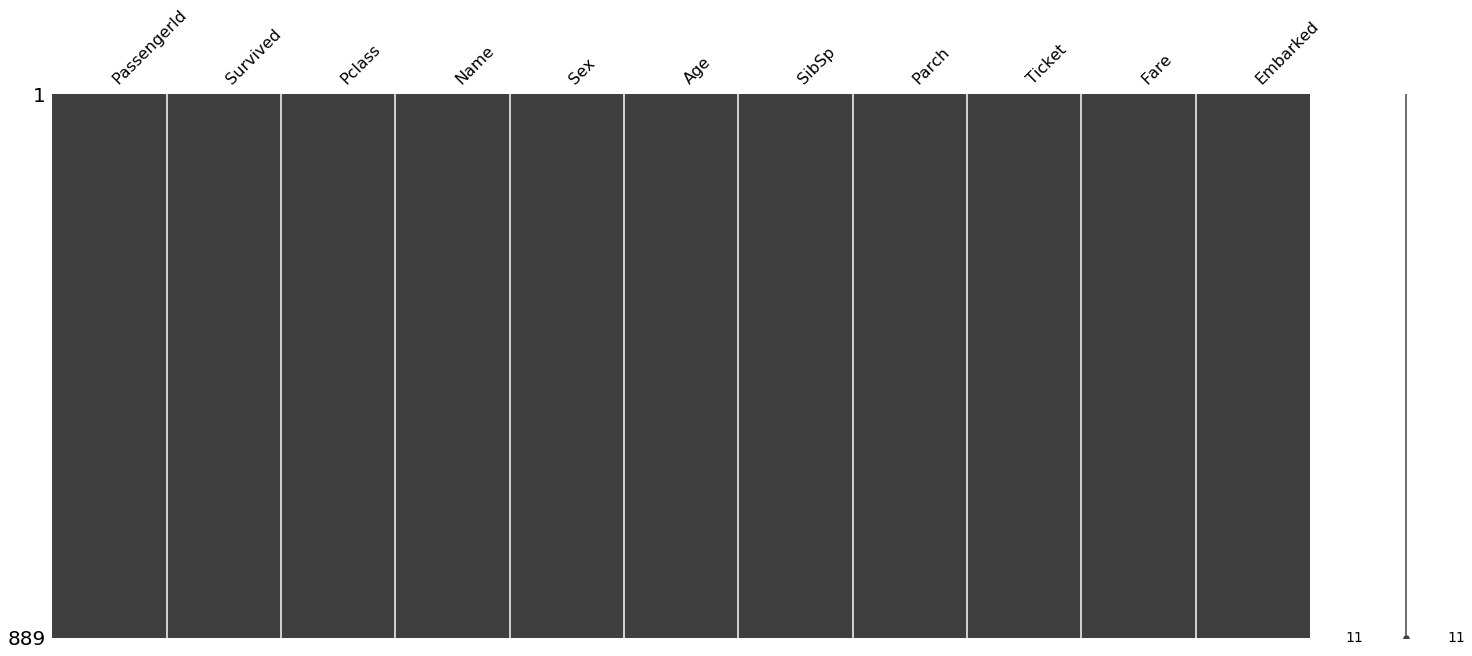

In [308]:
ms.matrix(data)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [13]:
def converting_categorical(feature):
    return pd.get_dummies(feature,drop_first=True)

In [14]:
sex = converting_categorical(data['Sex'])
embark = converting_categorical(data['Embarked'])

droping_features(['Sex','Embarked','Name','Ticket'],data)
data = pd.concat([data,sex,embark],axis=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


In [16]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=101)

In [18]:
from sklearn.linear_model import LogisticRegression

# Build the Model.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [184]:
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier() #default 
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [181]:
from sklearn import svm
svm_clf = svm.SVC(gamma=0.005, C=200)
svm_clf.fit(X_train,y_train)

SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [178]:
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier(max_depth=10)
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [229]:
from sklearn import ensemble
clf_gb = ensemble.GradientBoostingClassifier(n_estimators=9)
clf_gb.fit(data.drop('Survived',axis=1),data['Survived'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=9, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [230]:
predict =  logmodel.predict(X_test)
predict2 = clf_gb.predict(X_test)


In [231]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict2))

             precision    recall  f1-score   support

          0       0.81      0.96      0.88       163
          1       0.92      0.64      0.76       104

avg / total       0.85      0.84      0.83       267



In [232]:
from sklearn.metrics import confusion_matrix

In [233]:
print(confusion_matrix(y_test, predict))

[[151  12]
 [ 36  68]]


In [234]:
test_data = pd.read_csv('titanic_test.csv')

In [235]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [236]:
droping_features('Cabin',test_data)

In [237]:
test_data['Age'] = test_data[['Age','Pclass']].apply(data_impute,axis=1)

In [238]:
ms.matrix(test_data)

NameError: name 'ms' is not defined

In [239]:
sex = converting_categorical(test_data['Sex'])
embark = converting_categorical(test_data['Embarked'])

droping_features(['Sex','Embarked','Name','Ticket'],test_data)
test_data = pd.concat([test_data,sex,embark],axis=1)

In [240]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [241]:
test_data.loc[test_data['Fare'].isnull(),'Fare'] = test_data["Fare"].mean()

In [242]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [243]:
final_predict =  clf_gb.predict(test_data)


In [244]:
final_predict = pd.DataFrame(final_predict,columns=['Survived'])

In [245]:
result = pd.DataFrame(test_data['PassengerId'],columns=['PassengerId'])

In [246]:
result = pd.concat([result,final_predict],axis=1)

In [247]:
result['PassengerId'] = result['PassengerId'].astype(int)

In [248]:
result.to_csv('final_predictions.csv',index=False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
